# MVP Cleaning

This is part 2 of 3 for Machine Learning NBA MVP Prediction. In this part, I will be cleaning up the data that was scraped in part 1 and make it more readable for the last part of the project.

In [1]:
#Using dfs from webscraper notebook
import pandas as pd

In [2]:
#Df for MVP voting history 1995-present
mvps = pd.read_csv("mvps.csv")
mvps.head()

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,David Robinson,29,SAS,73.0,901.0,1050,0.858,81,...,10.8,2.9,1.7,3.2,0.530,0.300,0.774,17.5,0.273,1995
1,1,2,Shaquille O'Neal,22,ORL,12.0,605.0,1050,0.576,79,...,11.4,2.7,0.9,2.4,0.583,0.000,0.533,14.0,0.230,1995
2,2,3,Karl Malone,31,UTA,14.0,532.0,1050,0.507,82,...,10.6,3.5,1.6,1.0,0.536,0.268,0.742,13.8,0.212,1995
3,3,4,Patrick Ewing,32,NYK,2.0,230.0,1050,0.219,79,...,11.0,2.7,0.9,2.0,0.503,0.286,0.750,9.6,0.157,1995
4,4,5,Hakeem Olajuwon,32,HOU,1.0,147.0,1050,0.140,72,...,10.8,3.5,1.8,3.4,0.517,0.188,0.756,10.7,0.181,1995


In [3]:
mvps = mvps[['Player','Year','Pts Won','Pts Max','Share']]
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,David Robinson,1995,901.0,1050,0.858
1,Shaquille O'Neal,1995,605.0,1050,0.576
2,Karl Malone,1995,532.0,1050,0.507
3,Patrick Ewing,1995,230.0,1050,0.219
4,Hakeem Olajuwon,1995,147.0,1050,0.140


In [4]:
#Df for all players stats 1995-present
players = pd.read_csv("players.csv")
players.head()

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,26,TOT,54,0,9.4,2.2,...,0.7,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,1995
1,1,1,Alaa Abdelnaby,PF,26,SAC,51,0,9.3,2.3,...,0.7,1.4,2.1,0.3,0.3,0.2,0.8,2.0,5.0,1995
2,2,1,Alaa Abdelnaby,PF,26,PHI,3,0,10.0,0.3,...,1.0,1.7,2.7,0.0,0.0,0.0,1.7,0.7,0.7,1995
3,3,2,Mahmoud Abdul-Rauf,PG,25,DEN,73,43,28.5,6.5,...,0.4,1.4,1.9,3.6,1.1,0.1,1.6,1.7,16.0,1995
4,4,3,Michael Adams,PG,32,CHH,29,0,15.3,2.3,...,0.2,0.8,1.0,3.3,0.8,0.0,0.9,1.4,6.5,1995


In [5]:
del players['Unnamed: 0']
del players['Rk']

In [6]:
players["Player"] = players["Player"].str.replace("*","", regex=False)
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,26,TOT,54,0,9.4,2.2,4.3,.511,...,0.7,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,1995
1,Alaa Abdelnaby,PF,26,SAC,51,0,9.3,2.3,4.3,.532,...,0.7,1.4,2.1,0.3,0.3,0.2,0.8,2.0,5.0,1995
2,Alaa Abdelnaby,PF,26,PHI,3,0,10.0,0.3,3.7,.091,...,1.0,1.7,2.7,0.0,0.0,0.0,1.7,0.7,0.7,1995
3,Mahmoud Abdul-Rauf,PG,25,DEN,73,43,28.5,6.5,13.8,.470,...,0.4,1.4,1.9,3.6,1.1,0.1,1.6,1.7,16.0,1995
4,Michael Adams,PG,32,CHH,29,0,15.3,2.3,5.1,.453,...,0.2,0.8,1.0,3.3,0.8,0.0,0.9,1.4,6.5,1995


In [7]:
#Create single row for players with multiple teams in one season
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df['Tm'] == 'TOT']
        row['Tm'] = df.iloc[-1,:]['Tm']
        return row
    
players = players.groupby(["Player","Year"]).apply(single_row)
players.head()

Player Pos Age   Tm   G  GS    MP   FG  FGA   FG%  \
Player     Year                                                               
A.C. Green 1995 165   A.C. Green  SF  31  PHO  82  52  32.8  3.8  7.5  .504   
           1996 661   A.C. Green  SF  32  PHO  82  36  25.8  2.6  5.4  .484   
           1997 1236  A.C. Green  PF  33  DAL  83  73  30.0  2.8  5.8  .483   
           1998 1823  A.C. Green  PF  34  DAL  82  68  32.3  3.0  6.5  .453   
           1999 2381  A.C. Green  PF  35  DAL  50  35  18.5  2.2  5.1  .422   

                      ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Year  
Player     Year       ...                                                      
A.C. Green 1995 165   ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8  11.2  1995  
           1996 661   ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0  1.7   7.5  1996  
           1997 1236  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9  1.7   7.2  1997  
           1998 1823  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8  1.9   7.3  1998  
           1999 2381  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4  1.4   4.9  1999  

[5 rows x 30 columns]

In [8]:
players.index = players.index.droplevel()
players.index = players.index.droplevel()

In [9]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
165,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
661,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996
1236,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
1823,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,2.7,5.5,8.1,1.5,1.0,0.3,0.8,1.9,7.3,1998
2381,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,1.6,2.9,4.6,0.5,0.6,0.2,0.4,1.4,4.9,1999


In [10]:
#Merge players and mvps dfs
combined = players.merge(mvps, how = 'outer', on = ['Player','Year'])
combined[['Pts Won','Pts Max','Share']] = combined[['Pts Won','Pts Max','Share']].fillna(0)
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
1,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0
2,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,0.8,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0
3,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,1.5,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0
4,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,0.5,0.6,0.2,0.4,1.4,4.9,1999,0.0,0.0,0.0


In [11]:
#Df for team records 1995-present
teams = pd.read_csv("teams.csv")
teams.head(10)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,57,25,.695,—,110.9,103.8,6.44,1995,Orlando Magic*
1,1,55,27,.671,2.0,98.2,95.1,2.78,1995,New York Knicks*
2,2,35,47,.427,22.0,102.8,104.7,-1.92,1995,Boston Celtics*
3,3,32,50,.390,25.0,101.1,102.8,-1.85,1995,Miami Heat
4,4,30,52,.366,27.0,98.1,101.2,-3.28,1995,New Jersey Nets
5,5,24,58,.293,33.0,95.4,100.4,-5.06,1995,Philadelphia 76ers
6,6,21,61,.256,36.0,100.5,106.1,-5.56,1995,Washington Bullets
7,7,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1995,Central Division
8,8,52,30,.634,—,99.2,95.5,3.35,1995,Indiana Pacers*
9,9,50,32,.610,2.0,100.6,97.3,2.87,1995,Charlotte Hornets*


In [12]:
teams = teams[~teams['W'].str.contains("Division")]
teams['Team'] = teams['Team'].str.replace("*","",regex=False)
teams = teams.rename(columns={'Team':'Tm'})
teams.head(10)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Tm
0,0,57,25,.695,—,110.9,103.8,6.44,1995,Orlando Magic
1,1,55,27,.671,2.0,98.2,95.1,2.78,1995,New York Knicks
2,2,35,47,.427,22.0,102.8,104.7,-1.92,1995,Boston Celtics
3,3,32,50,.390,25.0,101.1,102.8,-1.85,1995,Miami Heat
4,4,30,52,.366,27.0,98.1,101.2,-3.28,1995,New Jersey Nets
5,5,24,58,.293,33.0,95.4,100.4,-5.06,1995,Philadelphia 76ers
6,6,21,61,.256,36.0,100.5,106.1,-5.56,1995,Washington Bullets
8,8,52,30,.634,—,99.2,95.5,3.35,1995,Indiana Pacers
9,9,50,32,.610,2.0,100.6,97.3,2.87,1995,Charlotte Hornets
10,10,47,35,.573,5.0,101.5,96.7,4.32,1995,Chicago Bulls


In [13]:
#Map team abbreviation to team name
team_map = {'PHO':'Phoenix Suns', 
            'DAL':'Dallas Mavericks',
            'LAL':'Los Angeles Lakers', 
            'MIA':'Miami Heat', 
            'CLE':'Cleveland Cavaliers', 
            'CHI':'Chicago Bulls', 
            'GSW':'Golden State Warriors', 
            'IND':'Indiana Pacers', 
            'WAS':'Washington Wizards', 
            'MIN':'Minnesota Timberwolves', 
            'HOU':'Houston Rockets', 
            'DEN':'Denver Nuggets', 
            'ORL':'Orlando Magic', 
            'NOH':'New Orleans Hornets', 
            'TOR':'Toronto Raptors', 
            'SAC':'Sacramento Kings', 
            'CHO':'Charlotte Hornets', 
            'PHI':'Philadelphia 76ers', 
            'POR':'Portland Trail Blazers', 
            'DET':'Detroit Pistons', 
            'BOS':'Boston Celtics', 
            'OKC':'Oklahoma City Thunder', 
            'MIL':'Milwaukee Bucks', 
            'VAN':'Vancouver Grizzlies', 
            'SEA':'Seattle SuperSonics', 
            'NJN':'New Jersey Nets', 
            'NOK':'New Orleans/Oklahoma City Hornets', 
            'LAC':'Los Angeles Clippers', 
            'ATL':'Atlanta Hawks', 
            'UTA':'Utah Jazz', 
            'CHA':'Charlotte Bobcats', 
            'MEM':'Memphis Grizzlies', 
            'NYK':'New York Knicks', 
            'NOP':'New Orleans Pelicans', 
            'BRK':'Brooklyn Nets', 
            'SAS':'San Antonio Spurs', 
            'CHH':'Charlotte Hornets', 
            'WSB':'Washington Bullets'}

In [14]:
combined = combined.replace({'Tm':team_map})
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,SF,31,Phoenix Suns,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
1,A.C. Green,SF,32,Phoenix Suns,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0
2,A.C. Green,PF,33,Dallas Mavericks,83,73,30.0,2.8,5.8,.483,...,0.8,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0
3,A.C. Green,PF,34,Dallas Mavericks,82,68,32.3,3.0,6.5,.453,...,1.5,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0
4,A.C. Green,PF,35,Dallas Mavericks,50,35,18.5,2.2,5.1,.422,...,0.5,0.6,0.2,0.4,1.4,4.9,1999,0.0,0.0,0.0


In [15]:
#Merge combined df with teams
stats = combined.merge(teams, how='outer',on=['Tm','Year'])
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,SF,31,Phoenix Suns,82,52,32.8,3.8,7.5,.504,...,0.0,0.000,8.0,59,23,.720,—,110.6,106.8,3.86
1,Aaron Swinson,SF,24,Phoenix Suns,9,0,5.7,1.1,2.0,.556,...,0.0,0.000,8.0,59,23,.720,—,110.6,106.8,3.86
2,Antonio Lang,SF,22,Phoenix Suns,12,0,4.4,0.3,0.8,.400,...,0.0,0.000,8.0,59,23,.720,—,110.6,106.8,3.86
3,Charles Barkley,PF,31,Phoenix Suns,68,66,35.0,8.1,16.8,.486,...,1050.0,0.091,8.0,59,23,.720,—,110.6,106.8,3.86
4,Dan Majerle,SF,29,Phoenix Suns,82,46,37.7,5.3,12.6,.425,...,0.0,0.000,8.0,59,23,.720,—,110.6,106.8,3.86


In [16]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,SF,31,Phoenix Suns,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
1,A.C. Green,SF,32,Phoenix Suns,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0
2,A.C. Green,PF,33,Dallas Mavericks,83,73,30.0,2.8,5.8,.483,...,0.8,0.8,0.2,0.9,1.7,7.2,1997,0.0,0.0,0.0
3,A.C. Green,PF,34,Dallas Mavericks,82,68,32.3,3.0,6.5,.453,...,1.5,1.0,0.3,0.8,1.9,7.3,1998,0.0,0.0,0.0
4,A.C. Green,PF,35,Dallas Mavericks,50,35,18.5,2.2,5.1,.422,...,0.5,0.6,0.2,0.4,1.4,4.9,1999,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13667,Željko Rebrača,C,29,Detroit Pistons,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
13668,Željko Rebrača,C,30,Detroit Pistons,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
13669,Željko Rebrača,C,31,Atlanta Hawks,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
13670,Željko Rebrača,C,32,Los Angeles Clippers,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


In [17]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,SF,31,Phoenix Suns,82,52,32.8,3.8,7.5,.504,...,0.0,0.000,8.0,59,23,.720,—,110.6,106.8,3.86
1,Aaron Swinson,SF,24,Phoenix Suns,9,0,5.7,1.1,2.0,.556,...,0.0,0.000,8.0,59,23,.720,—,110.6,106.8,3.86
2,Antonio Lang,SF,22,Phoenix Suns,12,0,4.4,0.3,0.8,.400,...,0.0,0.000,8.0,59,23,.720,—,110.6,106.8,3.86
3,Charles Barkley,PF,31,Phoenix Suns,68,66,35.0,8.1,16.8,.486,...,1050.0,0.091,8.0,59,23,.720,—,110.6,106.8,3.86
4,Dan Majerle,SF,29,Phoenix Suns,82,46,37.7,5.3,12.6,.425,...,0.0,0.000,8.0,59,23,.720,—,110.6,106.8,3.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13697,NaN,NaN,NaN,Memphis Grizzlies (2),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.0,51,31,.622,—,116.9,113.0,3.60
13698,NaN,NaN,NaN,New Orleans Pelicans (9),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,14.0,42,40,.512,9.0,114.4,112.5,1.63
13699,NaN,NaN,NaN,Dallas Mavericks (11),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.0,38,44,.463,13.0,114.2,114.1,-0.14
13700,NaN,NaN,NaN,Houston Rockets (14),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.0,22,60,.268,29.0,110.7,118.6,-7.62


In [18]:
del stats['Unnamed: 0']

In [19]:
stats = stats.apply(pd.to_numeric, errors='ignore')
stats['GB'] = stats['GB'].str.replace('—',"0")
stats.dtypes

Player      object
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
W          float64
L          float64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [20]:
stats['GB'].unique()

array(['0', '23.0', '40.0', '42.0', '18.0', '6.0', '24.0', nan, '37.0',
       '29.0', '21.0', '28.0', '25.0', '8.0', '19.0', '1.0', '13.0',
       '17.0', '3.0', '15.0', '9.0', '2.0', '35.0', '20.0', '11.0', '5.0',
       '26.0', '16.0', '41.0', '12.0', '14.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '7.0', '46.0', '10.5', '32.0', '38.0',
       '27.0', '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5',
       '11.5', '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5',
       '4.5'], dtype=object)

In [21]:
stats['GB'] = pd.to_numeric(stats['GB'])
stats.dtypes

Player      object
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
W          float64
L          float64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [22]:
stats.to_csv("player_mvp_stats.csv")

/Users/siddthekidd/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:2074: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


<AxesSubplot:xlabel='Player'>

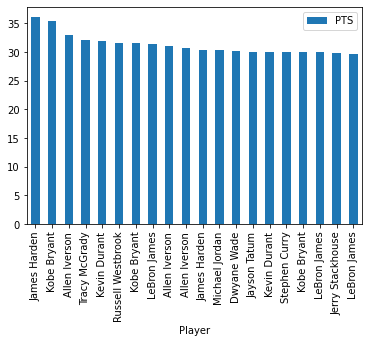

In [23]:
highest_scoring = stats[stats['G']>70].sort_values("PTS", ascending = False).head(20)
highest_scoring.plot.bar('Player','PTS')

<AxesSubplot:xlabel='Year'>

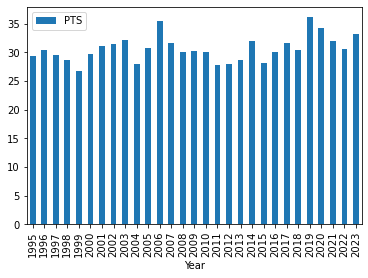

In [24]:
score_per_year = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending = False).head(1))
score_per_year.plot.bar("Year",'PTS')

In [25]:
stats.corr()['Share']

Age        0.016435
G          0.088155
GS         0.165385
MP         0.157397
FG         0.270543
FGA        0.242679
FG%        0.063073
3P         0.094369
3PA        0.094429
3P%        0.012182
2P         0.273920
2PA        0.249515
2P%        0.057136
eFG%       0.054819
FT         0.318591
FTA        0.324286
FT%        0.036375
ORB        0.096615
DRB        0.214136
TRB        0.186483
AST        0.205688
STL        0.164138
BLK        0.137819
TOV        0.235399
PF         0.069644
PTS        0.282717
Year      -0.007786
Pts Won    0.995905
Pts Max    0.524915
Share      1.000000
W          0.119017
L         -0.118731
W/L%       0.123462
GB        -0.096926
PS/G       0.042249
PA/G      -0.036420
SRS        0.119166
Name: Share, dtype: float64